## Cleaning Stock Market Data

In [2]:
# Import dependencies 
import os
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read csv
df=pd.read_csv("Data/CHWY.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,36.000000,41.340000,32.740002,34.990002,34.990002,69671400
1,2019-06-17,34.720001,35.360001,32.669998,33.700001,33.700001,15403000
2,2019-06-18,34.500000,37.470001,34.349998,37.360001,37.360001,11022800
3,2019-06-19,37.599998,37.630001,34.250000,34.900002,34.900002,11163600
4,2019-06-20,35.110001,35.549999,33.599998,34.230000,34.230000,7901000


In [5]:
# Check datatypes
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
# Convert date column from object to datetime format
df["Date"] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,36.000000,41.340000,32.740002,34.990002,34.990002,69671400
1,2019-06-17,34.720001,35.360001,32.669998,33.700001,33.700001,15403000
2,2019-06-18,34.500000,37.470001,34.349998,37.360001,37.360001,11022800
3,2019-06-19,37.599998,37.630001,34.250000,34.900002,34.900002,11163600
4,2019-06-20,35.110001,35.549999,33.599998,34.230000,34.230000,7901000


In [15]:
# Confirm datatypes
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

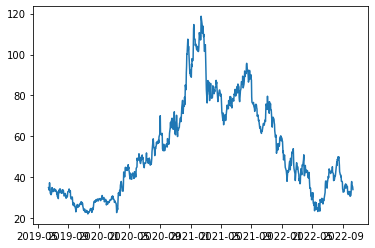

In [16]:
# Plot the stock prices against date
plt.plot(df.Date, df.Close)

In [20]:
# Check for null values
df.isnull().values.any()

False

In [21]:
# Remove null values
df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,36.000000,41.340000,32.740002,34.990002,34.990002,69671400
1,2019-06-17,34.720001,35.360001,32.669998,33.700001,33.700001,15403000
2,2019-06-18,34.500000,37.470001,34.349998,37.360001,37.360001,11022800
3,2019-06-19,37.599998,37.630001,34.250000,34.900002,34.900002,11163600
4,2019-06-20,35.110001,35.549999,33.599998,34.230000,34.230000,7901000
...,...,...,...,...,...,...,...
834,2022-10-05,32.650002,37.169998,32.564999,36.669998,36.669998,10598900
835,2022-10-06,36.660000,38.650002,36.360001,37.939999,37.939999,6125100
836,2022-10-07,37.160000,38.389999,35.680000,36.340000,36.340000,5712700
837,2022-10-10,36.240002,37.020000,34.799999,35.340000,35.340000,4000800


In [25]:
# Export cleaned data
df.to_csv("cleaned_data/CHWY_cleaned.csv")